CPU times: user 1min 44s, sys: 1min 51s, total: 3min 36s
Wall time: 17.6 s
CPU times: user 1min 55s, sys: 2min 3s, total: 3min 58s
Wall time: 20.1 s


/home/otsukalab/.local/share/virtualenvs/reparam-cfaYz6qU/lib/python3.6/site-packages/autograd/numpy/numpy_vjps.py:90: RuntimeWarning: overflow encountered in square
  defvjp(anp.tanh,   lambda ans, x : lambda g: g / anp.cosh(x) **2)


CPU times: user 2min 41s, sys: 2min 9s, total: 4min 51s
Wall time: 28.6 s
CPU times: user 2min 40s, sys: 2min 10s, total: 4min 51s
Wall time: 28.7 s
CPU times: user 3min 20s, sys: 2min 28s, total: 5min 48s
Wall time: 40.8 s


Text(0.5, 1.02, 'multistory_building_32x64_0.5')

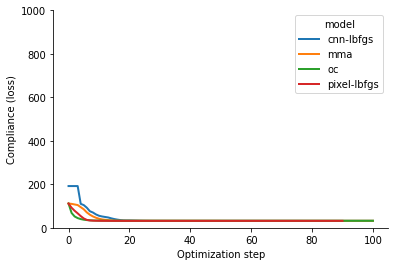

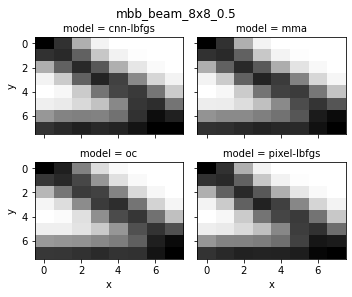

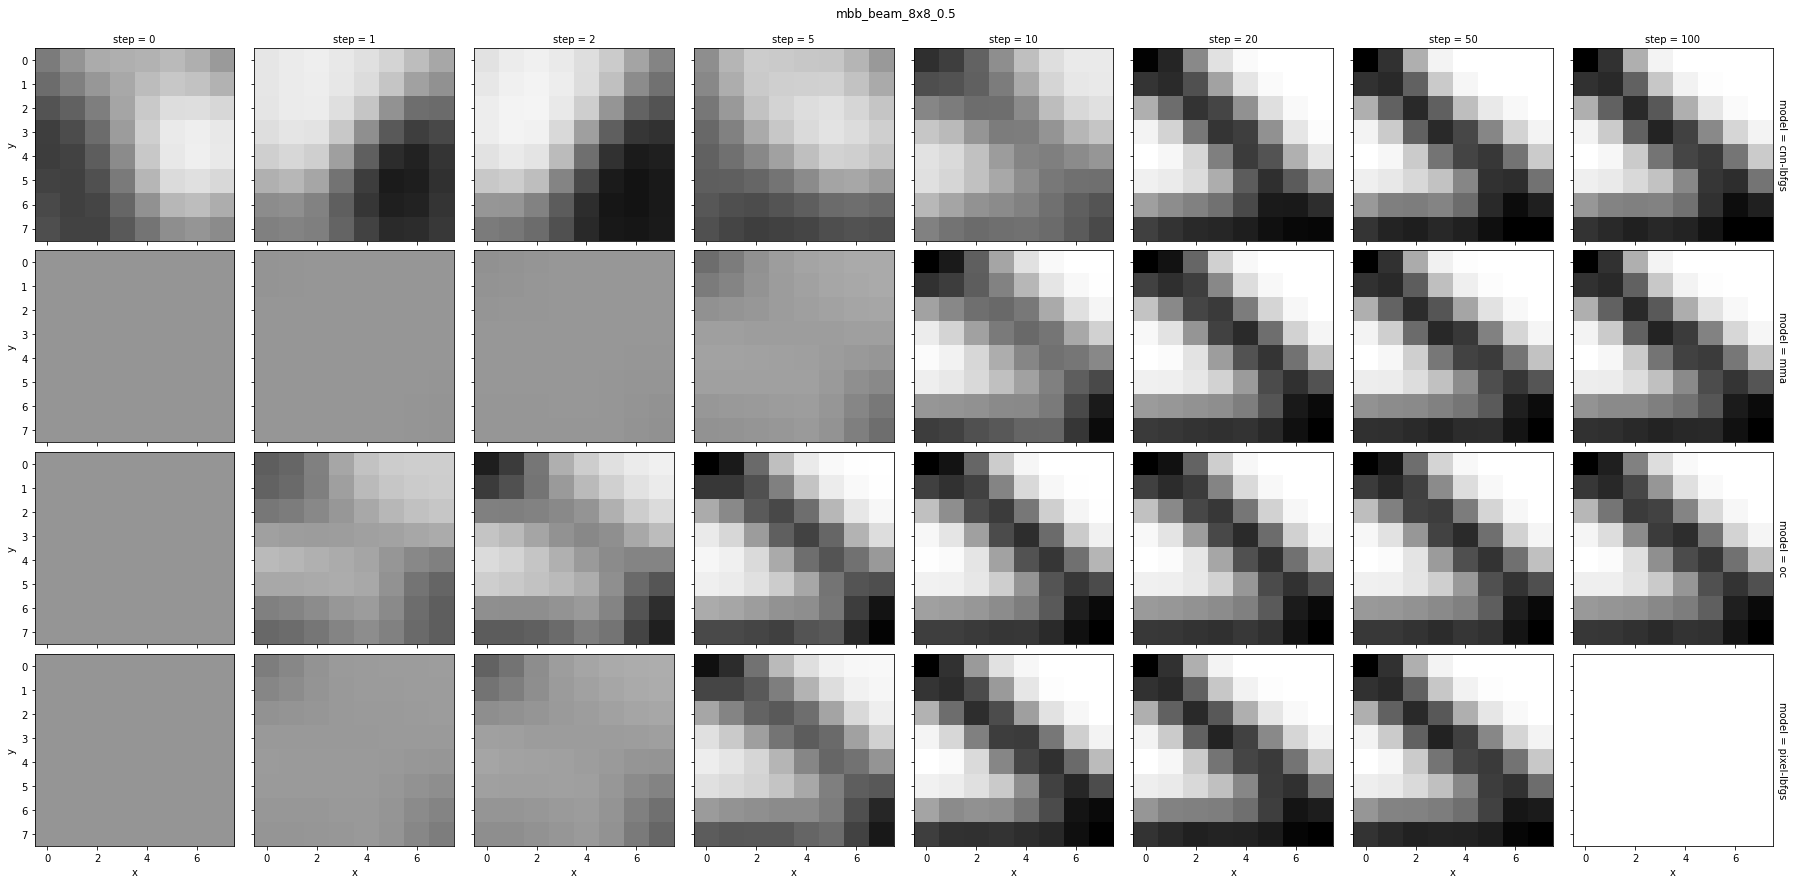

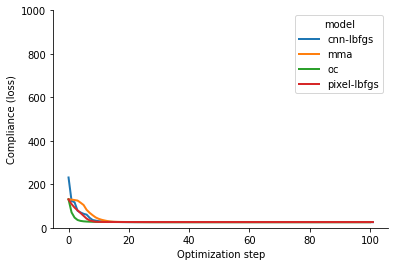

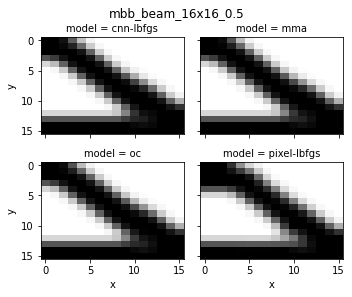

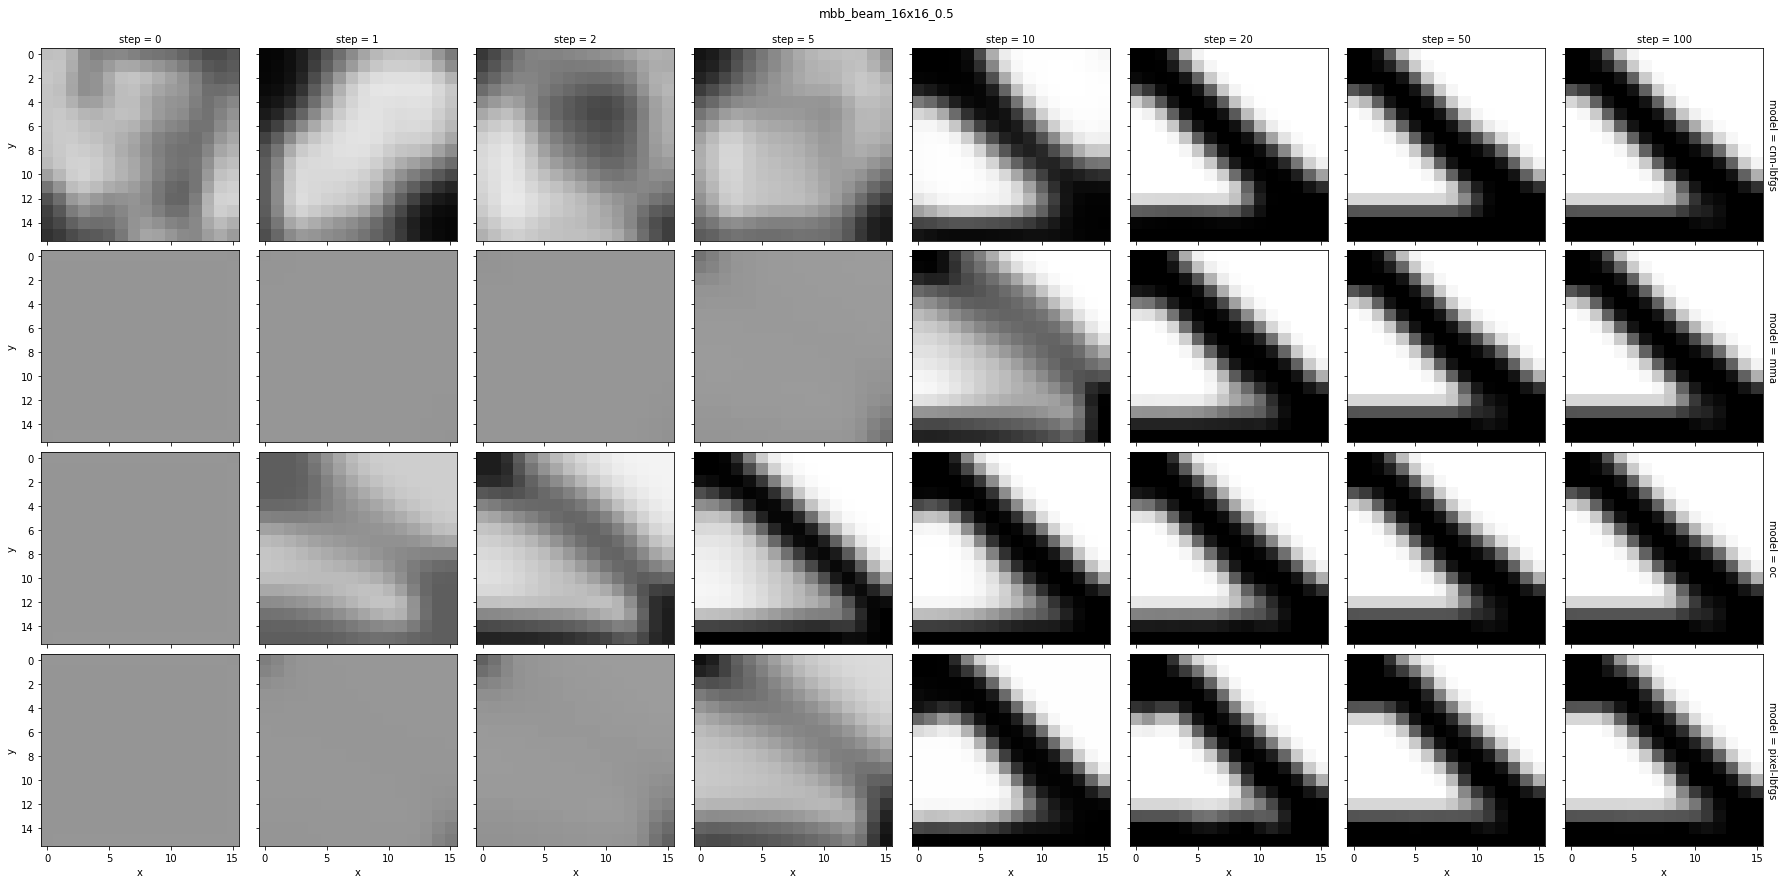

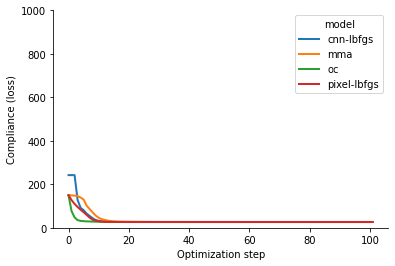

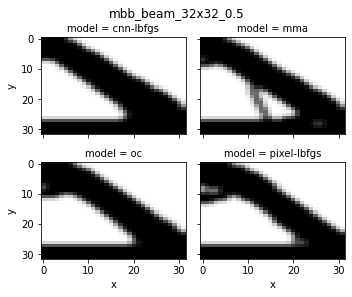

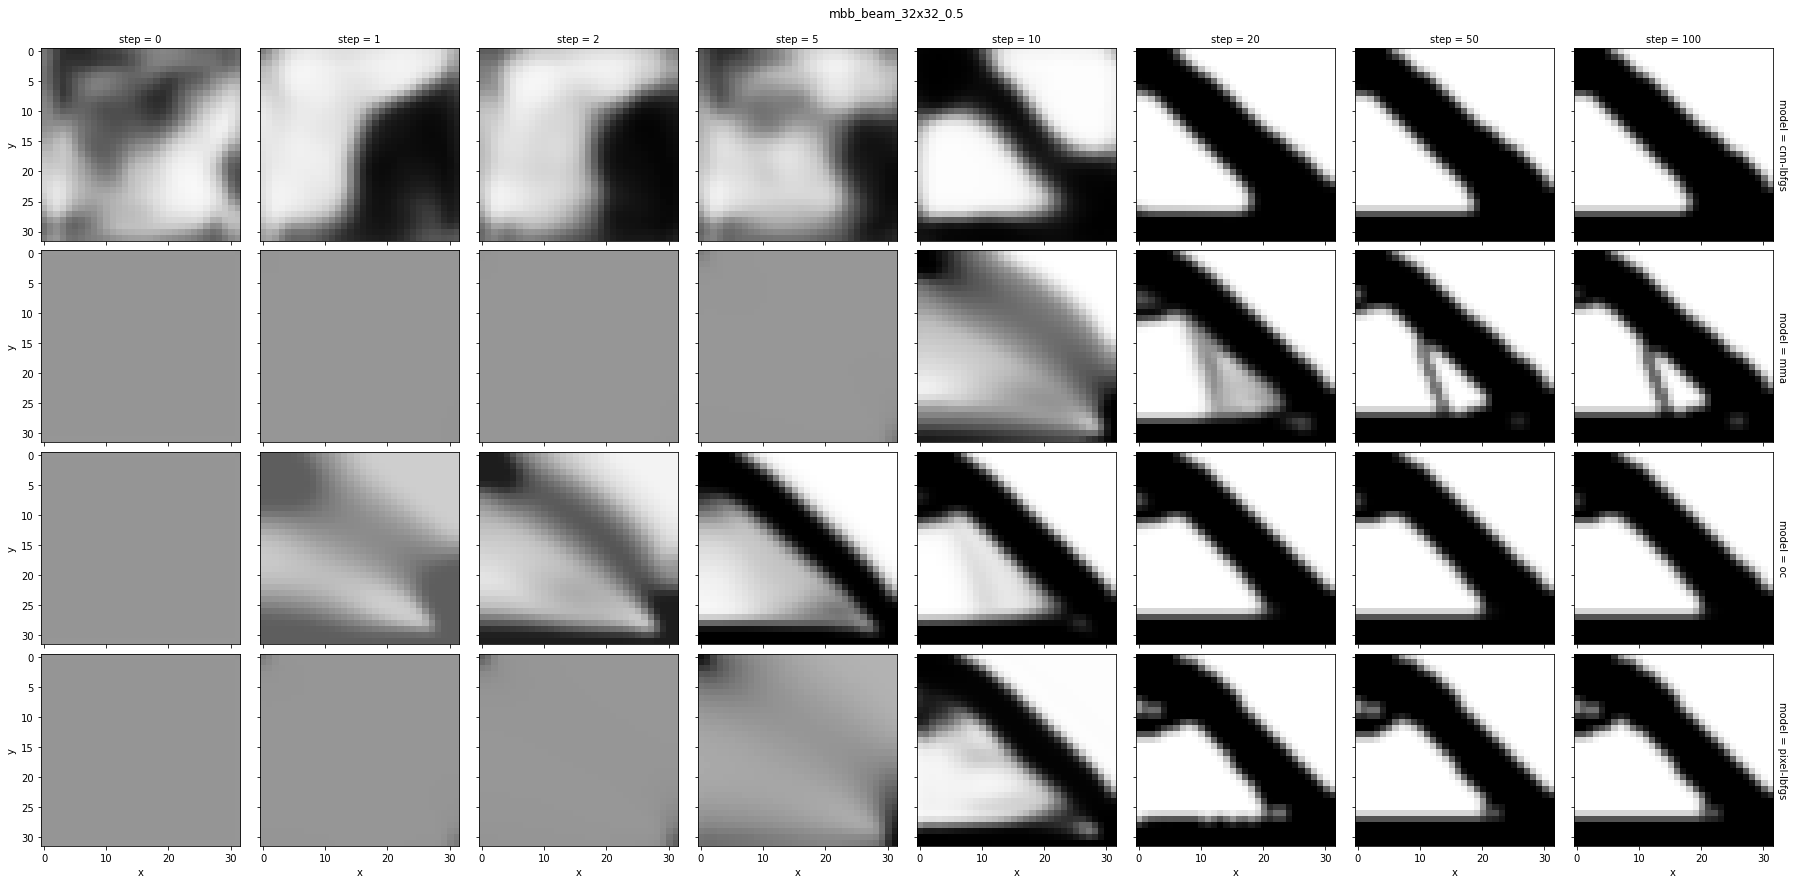

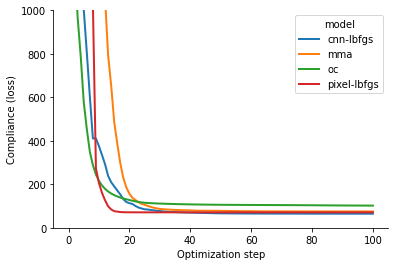

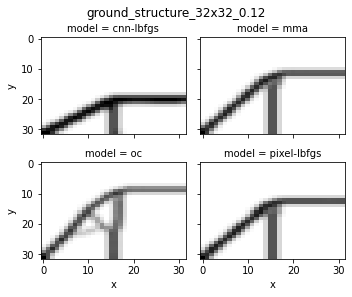

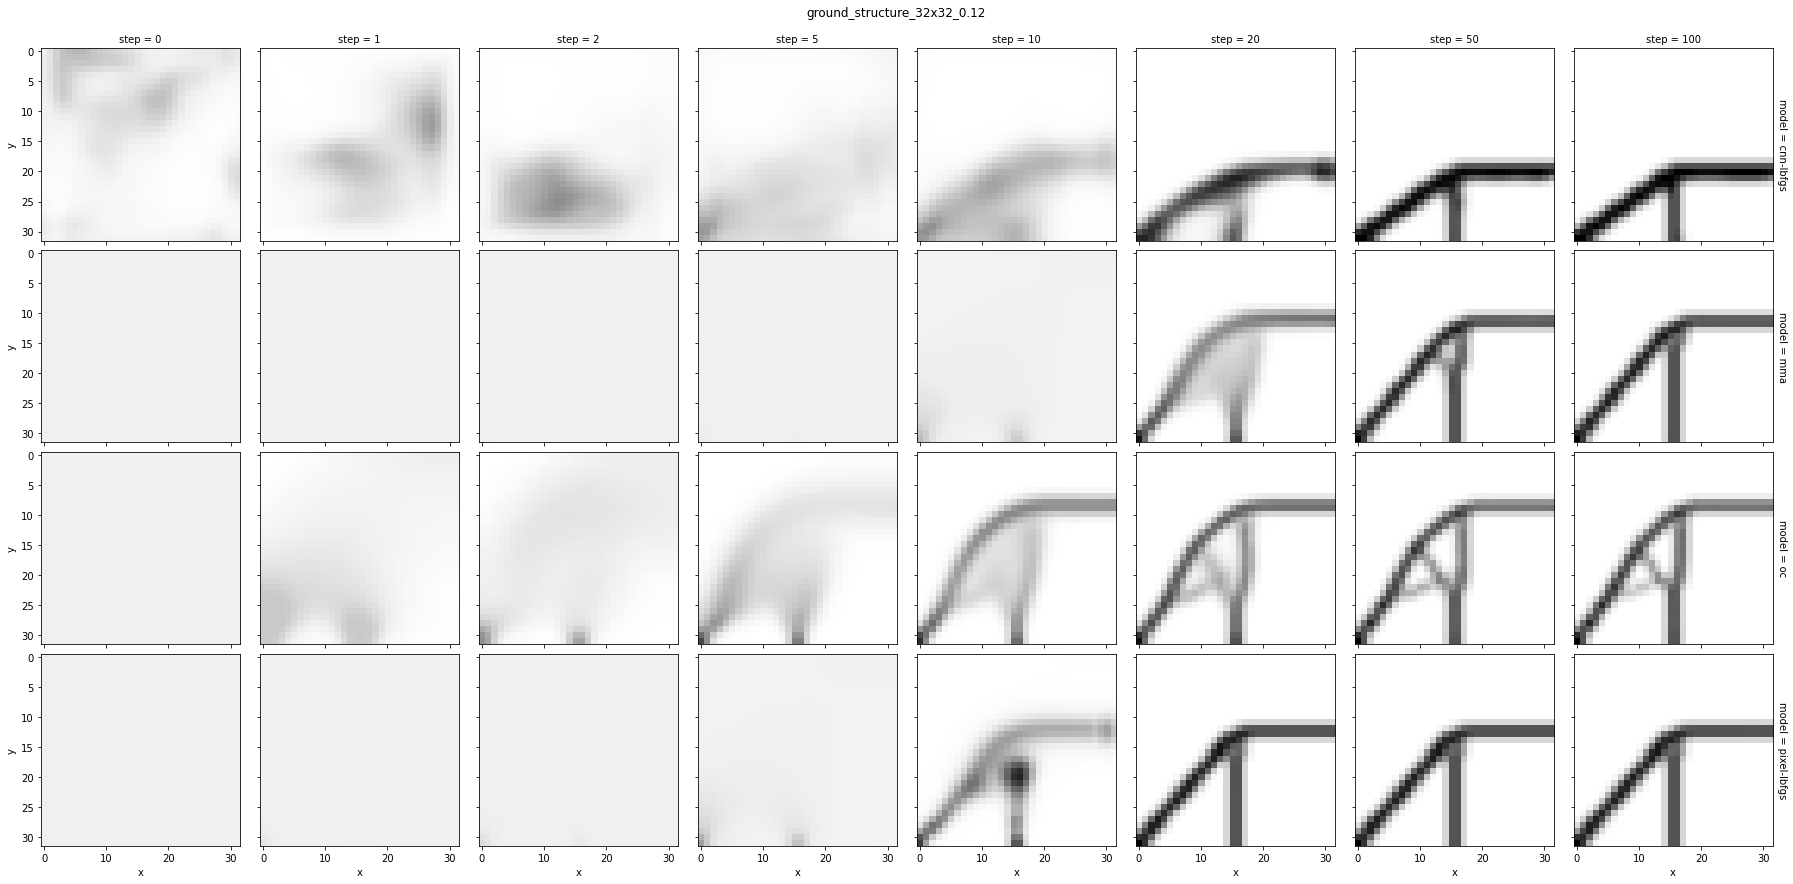

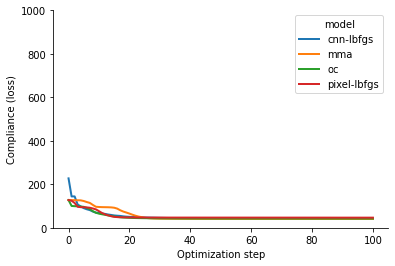

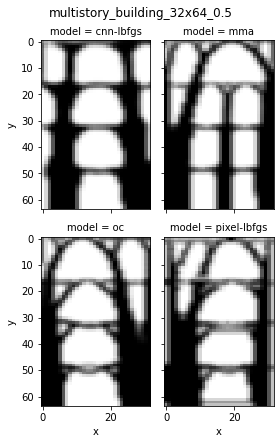

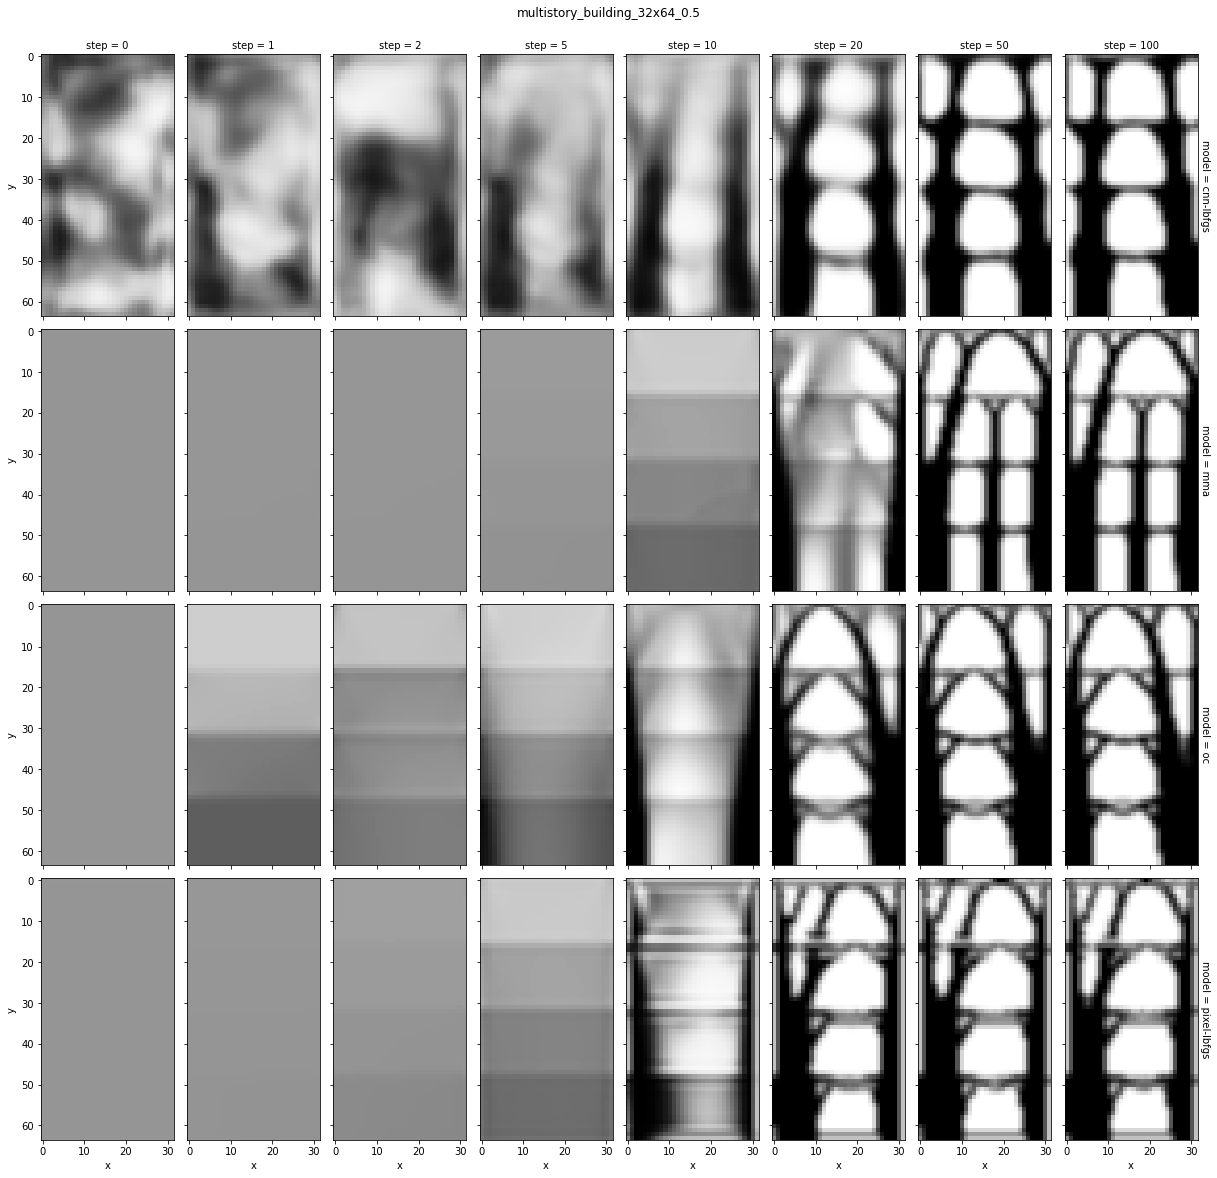

In [2]:
from IPython import display
from PIL import Image
import seaborn
import matplotlib.pyplot as plt
import xarray
import pandas as pd

from neural_structural_optimization.Opt_2DModel_20201206 import pipeline_utils
from neural_structural_optimization.Opt_2DModel_20201206 import problems
from neural_structural_optimization.Opt_2DModel_20201206 import models
from neural_structural_optimization.Opt_2DModel_20201206 import topo_api
from neural_structural_optimization.Opt_2DModel_20201206 import train


def train_all(problem, max_iterations, cnn_kwargs=None):
    args = topo_api.specified_task(problem)
    if cnn_kwargs is None:
        cnn_kwargs = {}

    model = models.PixelModel(args=args)
    ds_mma = train.method_of_moving_asymptotes(model, max_iterations)

    model = models.PixelModel(args=args)
    ds_oc = train.optimality_criteria(model, max_iterations)

    model = models.PixelModel(args=args)
    ds_pix = train.train_lbfgs(model, max_iterations)

    model = models.CNNModel(args=args, **cnn_kwargs)
    ds_cnn = train.train_lbfgs(model, max_iterations)

    dims = pd.Index(['cnn-lbfgs', 'mma', 'oc', 'pixel-lbfgs'], name='model')
    return xarray.concat([ds_cnn, ds_mma, ds_oc, ds_pix], dim=dims)

#"MBB beam"
problem = problems.PROBLEMS_BY_NAME['mbb_beam_8x8_0.5']
max_iterations = 100
%time ds = train_all(problem, max_iterations)

ds.loss.transpose().to_pandas().cummin().loc[:200].plot(linewidth=2)
plt.ylim(0, 1000)
plt.ylabel('Compliance (loss)')
plt.xlabel('Optimization step')
seaborn.despine()

ds.design.ffill('step').sel(step=100).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=1, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

ds.design.sel(step=[0, 1, 2, 5, 10, 20, 50, 100]).plot.imshow(
    row='model', col='step', x='x', y='y', size=3, aspect=1,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.suptitle(problem.name, y=1.02)

problem = problems.PROBLEMS_BY_NAME['mbb_beam_16x16_0.5']
max_iterations = 100
%time ds = train_all(problem, max_iterations)

ds.loss.transpose().to_pandas().cummin().loc[:200].plot(linewidth=2)
plt.ylim(0, 1000)
plt.ylabel('Compliance (loss)')
plt.xlabel('Optimization step')
seaborn.despine()

ds.design.ffill('step').sel(step=100).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=1, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

ds.design.sel(step=[0, 1, 2, 5, 10, 20, 50, 100]).plot.imshow(
    row='model', col='step', x='x', y='y', size=3, aspect=1,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.suptitle(problem.name, y=1.02)

problem = problems.PROBLEMS_BY_NAME['mbb_beam_32x32_0.5']
max_iterations = 100
%time ds = train_all(problem, max_iterations)

ds.loss.transpose().to_pandas().cummin().loc[:200].plot(linewidth=2)
plt.ylim(0, 1000)
plt.ylabel('Compliance (loss)')
plt.xlabel('Optimization step')
seaborn.despine()

ds.design.ffill('step').sel(step=100).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=1, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

ds.design.sel(step=[0, 1, 2, 5, 10, 20, 50, 100]).plot.imshow(
    row='model', col='step', x='x', y='y', size=3, aspect=1,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.suptitle(problem.name, y=1.02)

#"Ground Structure"
problem = problems.PROBLEMS_BY_NAME['ground_structure_32x32_0.12']
max_iterations = 100
%time ds = train_all(problem, max_iterations)

ds.loss.transpose().to_pandas().cummin().loc[:200].plot(linewidth=2)
plt.ylim(0, 1000)
plt.ylabel('Compliance (loss)')
plt.xlabel('Optimization step')
seaborn.despine()

ds.design.ffill('step').sel(step=100).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=1, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

ds.design.sel(step=[0, 1, 2, 5, 10, 20, 50, 100]).plot.imshow(
    row='model', col='step', x='x', y='y', size=3, aspect=1,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.suptitle(problem.name, y=1.02)


#"Multistory Building"
problem = problems.PROBLEMS_BY_NAME['multistory_building_32x64_0.5']
max_iterations = 100
%time ds = train_all(problem, max_iterations)

ds.loss.transpose().to_pandas().cummin().loc[:200].plot(linewidth=2)
plt.ylim(0, 1000)
plt.ylabel('Compliance (loss)')
plt.xlabel('Optimization step')
seaborn.despine()

ds.design.ffill('step').sel(step=100).plot.imshow(
    col='model', x='x', y='y', size=3, aspect=0.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)


ds.design.sel(step=[0, 1, 2, 5, 10, 20, 50, 100]).plot.imshow(
    row='model', col='step', x='x', y='y', size=4, aspect=0.5,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.suptitle(problem.name, y=1.02)



